# Outlier Detection

Outlier detection is a notoriously difficult task. The most general definition, **a point that does not conform to the dominant pattern or distribution of the data**, is hopelessly vague, and the problem is complicated further by the fact that modern datasets are high-dimensional, noisy, and structured in many different ways. It is not surprising, then, that a huge number of different approaches exist. 

In this notebook, we will first discuss the **univariate case**, focussing on three popular methods:

- Z-Score
- Robust Z-Score
- Boxplot Criterion

In the **multivariate case**, again, there are innumerable methods for outlier detection. We'll present two popular ones:


- Coordinatewise (Marginal) Methods

- Mahalanobis Distance

These methods contrast univariate thinking (treating each feature separately) with true multivariate thinking (treating the data cloud of vectors as a geometric object shaped by the joint variation and correlations among the features).

## The One-Dimensional Case

Outlier detection for a univariate dataset $X = \{x_1,\cdots,x_n\}$ is already quite complex, and there is a long list of methods developed by statisticians
over the years. Three of the most common techniques are:

1. **Absolute Deviation**:  A value $x_i$ is considered an **outlier** if its distance from the mean exceeds some threshold $T$:
$$|x_i - \mu| > T.$$

2. **Z-Score**:   We standardize the dataset:
   $$z_i\ =\ \frac{x_i - \mu}{\sigma}$$
   and then define the **decision boundary** by flagging a value $x_i$ as an outlier if $|z_i|>k$. Typical values for $k$ are
    - $k=2$, corresponding to the $4.55\%$ most extreme values, and
    - $k=3$, corresponding to the $0.27\%$ most extreme values.

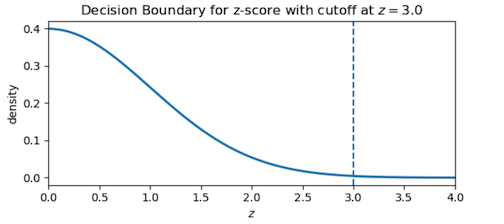

> **Example** 
>
> Suppose someone entered the list $[1,2,3,4,5,6,7]$ by hand and forgot the last comma, producing the list 
> $[1,2,3,4,5,67]$. Clearly the mistake can be discovered if the 67 is flagged as an outlier, which is obvious from the scatterplot:
>     
> 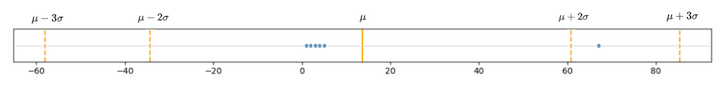 
>                  
> Now, 
>         
> - $\mu = 13.67$,
> - $\sigma = 23.87$, 
> - The decision boundary for $2\sigma$ is $[-34.07, 61.41]$, and
> - For $3\sigma$ it is $[-57.99, 85.33]$
> 
> and since $61.41 < 67 < 85.33$ the outlier is flagged with $k=2$ but not $k=3$.

The problem with the z-score method is that the **mean** is very sensitive to extreme outliers,
a well-known problem in statistics that leads us to consider using the **median** instead. 


3. **Robust Z-Score:**

   If we modify the z-score method to use the **median** instead of the mean, and the **Median Absolute Deviation**
$$
\operatorname{MAD}
= \operatorname{median}\;\left(\ \, \bigl| x_i - M \bigr| \, \text{ for } i = 1,\ldots,n\ \right)
$$
   instead of $\sigma$, then we can express this new method as:
$$
z_i^{\text{MAD}} = \frac{x_i - M}{\operatorname{MAD}}.
$$
Clearly we have simply retro-fitted the median into the z-score method!


> **Example:**
> 
> - Median
> 
> $$M = \mathrm{median}([1,2,3,4,5,67]) = 3.5.$$
>  
> - Absolute deviations
> 
> $$|x_i - M| = [\,0.5, 0.5, 1.5, 1.5,2.5, 63.5\,].$$
> 
> - MAD
> 
> $$\mathrm{MAD} = \mathrm{median}(|x_i - M|) = 1.5.$$
> 
> - Robust z-scores
> $$[\,-1.67, -1.0  , -0.33,  0.33,  1.0  , 42.33\,].$$ 
> For $k=3$, obviously $42.33>3$ so the original value 67 was an extreme outlier.

**Notes:**

* Method 1 uses the $L^1$ notion of distance; Method 2 uses the $L^2$ notion of distance.
* Method 3 protects against skewed or unbalanced outliers by using the median, which stays nearly fixed even when extreme values pull the mean away from the bulk of the data. In effect, we want our detection methods to behave as if the summary statistics we use (such as $ \mu $ or $ \sigma $) were computed *after* the outliers had been removed — even though we do not know which points are outliers beforehand. The median approximates this ideal because it is far less influenced by a few extreme observations.


4. **Boxplot (with the IQR Outlier Rule):**

The Boxplot was invented by John Tukey, one of the founders of modern statistics; note that it also uses the median (and percentiles). 

   The four **quartiles** $Q_1, Q_2, Q_3, Q_4$ are defined as the 25th, 50th, 75th, and 100th percentiles, respectively.  These are scalars values, e.g., $Q_2$ is just the median. 

   The **interquartile range (IQR)** measures the spread of the *middle 50%* of the data.
   $$
   \text{IQR} = Q_3 - Q_1.
   $$


   The **boxplot criterion** says: A point $x_i$ is an **outlier** if
>  $$ x_i < Q_1 - 1.5 \cdot\text{IQR}\quad \text{or} \quad x_i > Q_3 + 1.5 \cdot\text{IQR}.$$

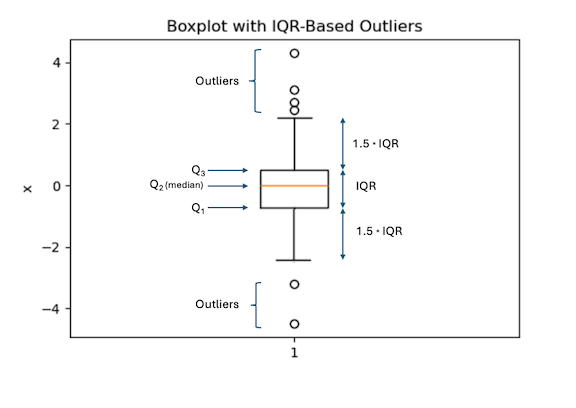


> **Example:**  
> For $[1,2,3,4,5,67]$ we have:
> 
> - Quartiles
> 
> $$Q_1 = 2.25, \qquad Q_2 = 3.5, \qquad Q_3 = 4.75$$
> 
> - Interquartile range
> $$\mathrm{IQR} = Q_3 - Q_1 = 4.75 - 2.25 = 2.5.$$
> 
> - Outlier bounds 
>     - Lower bound:
> $$Q_1 - 1.5(\mathrm{IQR})= 2.25 - 1.5(2.5)= -1.5.$$
>      - Upper bound:
> $$Q_3 + 1.5(\mathrm{IQR})= 4.5 + 1.5(2.5)= 8.5.$$
> 
> Since $67 > 8.5,$ then $67$ is an outlier, which is clear from the boxplot:
> 
> 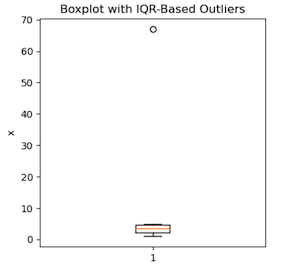

Notes:  
- The factor **1.5** is just a conventional choice: “farther than 1.5 times the usual spread of the middle data.”  
- This rule is **nonparametric**: it **does not assume normality**.  
- It is also **robust**: quartiles and IQR are much less affected by extreme values than the mean and standard deviation.  

This is exactly what most plotting libraries use when they draw boxplots and show “dots” as outliers.



### Python Examples

#### Synthetic dataset with normal distribution + outliers

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# -----------------------------
# 1. Make a 1D dataset
# -----------------------------
# "Normal" data
x_inliers = np.random.normal(loc=0.0, scale=1.0, size=100)

# Add some clear outliers
x_outliers = np.array([-5.0, -3.5, 3.2, 4.5])
x = np.concatenate([x_inliers, x_outliers])

n = len(x)

# For plotting: all points lie on a horizontal line
y = np.zeros_like(x)

In [ ]:
# sorted(x,reverse=True)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# x : your 1D data array
# If you don't already have x defined, uncomment this example:
# np.random.seed(42)
# x_inliers = np.random.normal(loc=0.0, scale=1.0, size=200)
# x_outliers = np.array([-5.0, -3.5, 3.2, 4.5])
# x = np.concatenate([x_inliers, x_outliers])

# ---- Compute mean and std ----
mu = x.mean()
sigma = x.std(ddof=1)

print(f"Mean (μ): {mu:.3f},  Std dev (σ): {sigma:.3f}")

# ---- 1D scatter with sigma lines ----
fig, ax = plt.subplots(figsize=(9, 2.5))

# all points on a horizontal line at y=0
ax.scatter(x, np.zeros_like(x), alpha=0.5)

# vertical line at mean
ax.axvline(mu, color="orange", label="μ")

# lines at μ ± 1σ, 2σ, 3σ
for k, style in zip([1, 2, 3], ["--", "-.", ":"]):
    ax.axvline(mu - k * sigma, color="orange", linestyle=style,
               label=f"μ - {k}σ" if k == 1 else None)
    ax.axvline(mu + k * sigma, color="orange", linestyle=style,
               label=f"μ + {k}σ" if k == 1 else None)

# optional zero-line for reference
ax.axvline(0, color="grey", alpha=0.4)

ax.set_yticks([])
ax.set_xlabel("x")
ax.set_title("Data with Mean and 1σ / 2σ / 3σ Boundaries")

# prevent duplicate legend entries
handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))
# ax.legend(unique.values(), unique.keys(), loc="upper left")

plt.tight_layout()
plt.show()


#### Method 2: Standard Z-Score

In [ ]:
mu = x.mean()
sigma = x.std(ddof=1)

z = (x - mu) / sigma
k = 3  # 3-sigma rule
mask_z = np.abs(z) > k


# x : your data (1D array)
# mu, sigma : mean and std of x
# k : z-score cutoff (e.g., 3)
# mask_z : boolean mask for |z| > k

bounds_z = [mu - k * sigma, mu + k * sigma]

fig, ax = plt.subplots(figsize=(9, 2.5))

# 1D scatter: non-outliers and outliers
ax.scatter(x[~mask_z], np.zeros(np.sum(~mask_z)),
           alpha=0.5, label="Inliers")
ax.scatter(x[mask_z], np.zeros(np.sum(mask_z)),
           color="red", marker="x", s=60, label="Outliers")

# Vertical lines at μ ± kσ
for b in bounds_z:
    ax.axvline(b, color="orange", linestyle="--")

# zero-line
ax.axvline(0, color="grey")

# vertical line at mean
ax.axvline(mu, color="orange", label="μ")

ax.set_yticks([])
ax.set_xlabel("x")
ax.set_title(f"Standard Z-Score with $\mu$ and Decision Boundaries at $\mu\pm 3\sigma$")
ax.legend(loc="upper left")

plt.tight_layout()
plt.show()

# ---- Print summary ----
num_outliers = np.sum(mask_z)
total_points = len(x)
percent_outliers = 100 * num_outliers / total_points

print(f"Mean:                {np.around(mu,4)}")
print(f"Standard Deviation:  {np.around(sigma,4)}")
print(f"Decision boundaries: {np.around(bounds_z, 4)}")
print(f"Z-score outliers:    {x[mask_z]}")
print(f"Number of outliers:  {num_outliers} / {total_points} "
      f"({percent_outliers:.2f}% of the data)")



### Method 3: Robust Z-Score

In [ ]:
# x : your 1D data array
# (If you don't already have x defined, uncomment the next lines)
# x_inliers = np.random.normal(loc=0.0, scale=1.0, size=200)
# x_outliers = np.array([-5.0, -3.5, 3.2, 4.5])
# x = np.concatenate([x_inliers, x_outliers])

# ---------- Robust z-score (median / MAD) ----------
M = np.median(x)
abs_dev = np.abs(x - M)
MAD = np.median(abs_dev)

z_robust = (x - M) / MAD
k = 3  # robust 3-sigma rule
mask_robust = np.abs(z_robust) > k

# bounds for visualization: M ± k·MAD
lower_bound = M - k * MAD
upper_bound = M + k * MAD

# ---------- Plot: single panel ----------
fig, ax = plt.subplots(figsize=(9, 2.5))

ax.scatter(x[~mask_robust], np.zeros(np.sum(~mask_robust)),
           alpha=0.5, label="Inliers")
ax.scatter(x[mask_robust], np.zeros(np.sum(mask_robust)),
           color="red", marker="x", s=60, label="Outliers")

# vertical lines at M ± k·MAD
ax.axvline(lower_bound, color="orange", linestyle="--")
ax.axvline(upper_bound, color="orange", linestyle="--")

# zero-line (optional, nice for symmetry)
ax.axvline(0, color="grey")

# vertical line at mean
ax.axvline(M, color="orange")

ax.set_yticks([])
ax.set_xlabel("x")
ax.set_title(f"Robust Z-Score with Median $M$ and Decision Boundaries at $M\pm 3MAD$")
ax.legend(loc="upper left")

plt.tight_layout()
plt.show()

# ---------- Print summary ----------
num_outliers = np.sum(mask_robust)
total_points = len(x)
percent_outliers = 100 * num_outliers / total_points

print(f"Median:                    {np.around(M,4)}")
print(f"MAD:                       {np.around(MAD,4)}")
print(f"Robust bounds (M ± k·MAD): [{lower_bound:.4f}, {upper_bound:.4f}]")
print(f"Robust z-score outliers:   {np.around(x[mask_robust],4)}")
print(f"Number of outliers:        {num_outliers} / {total_points} "
      f"({percent_outliers:.2f}% of the data)")


### Method 4: BoxPlots

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# x : your 1D data array
# If you don't already have x defined, uncomment this example:
# np.random.seed(42)
# x_inliers = np.random.normal(loc=0.0, scale=1.0, size=200)
# x_outliers = np.array([-5.0, -3.5, 3.2, 4.5])
# x = np.concatenate([x_inliers, x_outliers])

# -----------------------------
# 1. Boxplot / IQR rule
# -----------------------------
Q1 = np.percentile(x, 25)
Q2 = np.percentile(x, 50)  # median
Q3 = np.percentile(x, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mask_iqr = (x < lower_bound) | (x > upper_bound)

# -----------------------------
# 2. Scatterplot with quartiles and IQR bounds
# -----------------------------
fig, ax = plt.subplots(figsize=(9, 2.5))

# all points on a horizontal line
ax.scatter(x[~mask_iqr], np.zeros(np.sum(~mask_iqr)),
           alpha=0.5)
ax.scatter(x[mask_iqr], np.zeros(np.sum(mask_iqr)),
           color="red", marker="x", s=60)

# vertical lines for Q1, Q2 (median), Q3
ax.axvline(Q1, color="black", linestyle="-", label="Quartiles $Q_1, Q_2, Q_3$")
ax.axvline(Q2, color="black", linestyle="-")
ax.axvline(Q3, color="black", linestyle="-")

# vertical lines for whisker bounds (Q1 - 1.5·IQR, Q3 + 1.5·IQR)
ax.axvline(lower_bound, color="orange", linestyle="--", label="Decision Boundaries")
ax.axvline(upper_bound, color="orange", linestyle="--")

# optional zero-line
ax.axvline(0, color="grey", alpha=0.4)

ax.set_yticks([])
ax.set_xlabel("x")
ax.set_title("IQR Rule: Quartiles and Decision Boundaries at $M\pm 1.5\cdot IQR$")

# deduplicate legend entries
handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))
ax.legend(unique.values(), unique.keys(), loc="upper left")

plt.tight_layout()
plt.show()

# Print summary with counts and percentages
num_outliers = np.sum(mask_iqr)
total_points = len(x)
percent_outliers = 100 * num_outliers / total_points



# -----------------------------
# 3. Boxplot using the same rule
# -----------------------------
plt.figure(figsize=(4, 4))
plt.boxplot(x, vert=True, showfliers=True)
plt.title("Boxplot with IQR-Based Outliers")
plt.ylabel("x")
plt.tight_layout()
plt.show()

print(f"Q1 = {Q1:.4f},  Median (Q2) = {Q2:.4f},  Q3 = {Q3:.4f}")
print(f"IQR =               {IQR:.4f}")
print(f"1.5*IQR bounds:     [{lower_bound:.4f}, {upper_bound:.4f}]")
print(f"IQR-rule outliers:  {sorted(np.around(x[mask_iqr],4))}")
print(f"Number of outliers: {num_outliers} / {total_points} "
      f"({percent_outliers:.2f}% of the data)")


## The Multivariate (Vector) Case

### From Univariate to Multivariate Outlier Detection

When our data consist of a single feature, outlier detection is a one-dimensional task:
we measure how unusual each value is relative to the rest of the distribution.

But in a dataset with $p$ features $X=$
$$
\begin{pmatrix}
x_{1}^{(1)} & x_{1}^{(2)} & \cdots & x_{1}^{(p)} \\
x_{2}^{(1)} & x_{2}^{(2)} & \cdots & x_{2}^{(p)} \\
\vdots      & \vdots      & \ddots & \vdots      \\
x_{n}^{(1)} & x_{n}^{(2)} & \cdots & x_{n}^{(p)}
\end{pmatrix}.
$$
each feature/column is itself a one-dimensional variable.
This means that 

> **All of our univariate methods extend directly to the multivariate case by applying them coordinatewise to each feature!**

### Coordinatewise (Marginal) Outlier Detection

For each feature $j = 1,\dots\,p$, treat the column
$$x_{1}^{(j)}, x_{2}^{(j)}, \dots, x_{n}^{(j)}$$
as a 1D dataset, apply one of the univariate outlier rules, and then mark a sample $x_i$ as an outlier if **any of its features** is flagged.

(We are examining all the **marginal distributions**, meaning the distributions of each single feature taken on its own, ignoring all other features in the dataset.) 


**Advantages of the Coordinatewise Method:**
- It is extremely easy to implement and clear in its judgements
- It applies naturally to the *common* situation where the dataset may have mistakes due to an individual human or sensor error. 

**Limitations of Coordinatewise Approaches:**

Even though all three methods extend cleanly to multiple features, they share the same limitation:

> They treat each feature independently and completely ignore **correlations** among features.

This means they fail in classic cases such as height–weight data, where no individual coordinate is unusual, but certain **combinations** are, such as a high-school basketball player 6 feet tall but only 120 lbs. 


## True Multivariate Outlier Detection: Mahalanobis Distance

The univariate methods (z-scores, robust z-scores, boxplots) examine **each feature separately**. A sample is flagged as an outlier if *any* of its coordinates looks unusual by itself. However, this misses outliers that are only unusual when the features are considered **together**, as with our basketball player. 

This motivates our presentation of a  **true multivariate method**, which treats each sample as a full vector with potential relationships between features rather than a set of independent coordinates. 


### Mahalanobis Distance (The Correct Multivariate Generalization of a Z-Score)

To account for correlations and unequal variances, we use the covariance matrix, which is
the *unnormalized* version of the correlation matrix we use to show heatmaps of feature correlations. 

**Covariance Matrix:**

$$
\Sigma = \operatorname{Cov}(X).
$$

where

$$
\Sigma_{j,k}
= \operatorname{Cov}\!\bigl(x^{(j)},\, x^{(k)}\bigr)
= \mathbb{E}\!\left[\,(x^{(j)} - \mu_j)\,(x^{(k)} - \mu_k)\,\right].
$$

**Notes:**

* $\Sigma$ is symmetric.
* Diagonal entries $\Sigma_{j,j}$ are variances of each feature, since then $j=k$.
* Off-diagonal entries measure how two features move together.
* The matrix as a whole captures the shape, orientation, and correlations of the data cloud.

**Example:**

On the left we have a bivariate dataset following a standard normal distribution with independent features; on the
right we have skewed the distribution so that the features have a correlation of 0.83:

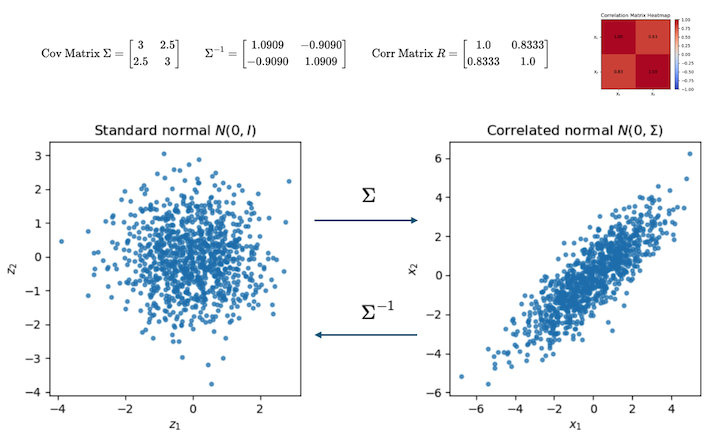



Instead of the vector norm (using Euclidean distance), we measure distance from the mean in units determined by $\Sigma$.

The **Mahalanobis Distance** is

$$
D_M(x)
=\sqrt{
\bigl(x - \mu\bigr)^{\top}\,\Sigma^{-1}\,\bigl(x - \mu\bigr)
}.
$$

The **Decision Rule** for using this metric for outlier detection involves something called the $\chi^2$-distribution,
and goes as follows:

1. Compute the **squared Mahalanobis distance** $D_M(x)^2$ for each point.
2. Choose a **cutoff percentile**, e.g., 0.975 would mean
   > “We expect 97.5% of non-outliers to fall inside this Mahalanobis contour.
   > Only the most extreme 2.5% will be flagged as potential outliers.”
     
   Typical values are 0.975 and 0.99, rough approximations of the $2\sigma$ and $3\sigma$ boundaries used in the z-score method. 
4. Look up the chi–square cutoff $\chi^2_{p,\,0.975}$ or $\chi^2_{p,\,0.99}$. 
5. Flag the point as an outlier if
   $$
   D_M(x)^2 \;>\; \chi^2_{p,\,0.975}
   \qquad\text{or}\qquad
   D_M(x)^2 \;>\; \chi^2_{p,\,0.99}.
   $$


#### Interpretation

* If $\Sigma = I$, then $D_M(x)$ reduces to the usual Euclidean distance
* If features have different variances, $\Sigma^{-1}$ rescales the axes
* If features are correlated, $\Sigma^{-1}$ rotates the space to remove the correlations

Mahalanobis distance measures how many standard deviations a point lies from the mean, 
after rescaling and rotating the space to reflect the actual joint variability of the features.
It is, in this sense, the **genuine multivariate analogue of a univariate z-score.**



## Summary

* Coordinatewise 1D methods cannot detect joint abnormalities.
* The $L_2$ norm of standardized vectors is a simple first step, but fails when features are correlated.
* Mahalanobis distance is the correct, covariance-aware metric for multivariate anomaly detection.
* It generalizes the z-score to higher dimensions and provides principled statistical thresholds.


## Python Examples

First we create a 2D dataset with a multivariate normal distribution, but with a small number of outliers, 
representing $1.67\%$ of the combined dataset. 

In [ ]:
# -----------------------------
# 1. Make a synthetic dataset
# -----------------------------
rng = np.random.default_rng(0)

# Correlated inliers (bivariate normal)
n_inliers = 300
mean = np.array([0.0, 0.0])
cov  = np.array([[3.0, 2.5],
                 [2.5, 3.0]])   # strong positive correlation

X_in = rng.multivariate_normal(mean, cov, size=n_inliers)         # Notice how the covariant matrix defines the shape of X

# A few obvious outliers
X_out = np.array([
    [ 6.0,  6.0],
    [-6.0,  5.0],
    [ 7.0, -5.0],
    [-5.0, -4.0],
    [ 4.0,  8.0],
])

# Combine
X_full = np.vstack([X_in, X_out])     # shape (n, 2)

N = len(X_full)

plt.figure(figsize=(6,6))
plt.title(f"Normal 2D dataset with outliers (N = {N})")
plt.scatter(X_in[:,0],
            X_in[:,1],  
            alpha=0.4, color="blue", label="Inliers",s=20)
plt.scatter(X_out[:,0],
            X_out[:,1], 
            alpha=0.8, color="red", label="Outliers",s=20)

# plt.legend(loc="upper left")
plt.show()

### Method 1: Coordinatewise Z-Scores

We'll demonstrate the z-score method; but remember that any of the univariate methods may be applied coordinatewise. 

In [ ]:
mu = X_full.mean(axis=0)
sigma = X_full.std(axis=0)

Z = (X_full - mu) / sigma   # shape (403, 2)

is_outlier = np.any(np.abs(Z) > 3, axis=1)               # simple rule: flag if any > 3 stdd

num_outliers = np.sum(is_outlier)
percent_outliers = 100 * num_outliers / N


plt.figure(figsize=(6,6))
plt.scatter(X_full[~is_outlier,0],
            X_full[~is_outlier,1],
            alpha=0.4, label="Inliers",s=20)
plt.scatter(X_full[is_outlier,0],
            X_full[is_outlier,1],
            color="red", label="Outliers",s=20)
plt.title("Coordinatewise Z-score Outlier Detection")
plt.legend(loc="upper left")
plt.show()

print(f"Number of outliers for k = 3:  {num_outliers} / {N} "
      f"({percent_outliers:.2f}% of the data)")

### Method 2: Mahalanobis Distances


In [ ]:
X

In [ ]:
from scipy.stats import chi2

X = X_full

# -----------------------------
# Mahalanobis distances
# -----------------------------
# Mean and covariance of the full sample
mu = X.mean(axis=0)
Sigma = np.cov(X, rowvar=False)
Sigma_inv = np.linalg.inv(Sigma)

# Centered data
diff = X - mu

# Squared Mahalanobis distance for each point:
# D_M(x)^2 = (x - mu)^T Sigma^{-1} (x - mu)
MD2 = np.sum(diff @ Sigma_inv * diff, axis=1)

# -----------------------------
# Chi-square cutoff (97.5%)
# -----------------------------
p = X.shape[1]                   # number of features (here p = 2)
cutoff = chi2.ppf(0.975, df=p)   # chi^2_{p, 0.975}

outliers = MD2 > cutoff          # boolean mask

num_outliers = np.sum(is_outlier)
percent_outliers = 100 * num_outliers / N

# -----------------------------
# Plot inliers vs outliers
# -----------------------------
plt.figure(figsize=(5, 5))

plt.scatter(X[~outliers, 0], X[~outliers, 1],
            alpha=0.6, label="Inliers",s=20)
plt.scatter(X[outliers, 0], X[outliers, 1],
            c="red",  label="Outliers",s=20)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Mahalanobis Distance Outlier Detection\n(99% chi-square cutoff)")
plt.legend()
plt.axis("equal")
plt.tight_layout()
plt.show()

print(f"Chi-square cutoff (p={p}, 0.975): {cutoff:.3f}")
print(f"Number of outliers:  {num_outliers} / {N} "
      f"({percent_outliers:.2f}% of the data)")


## Appendix 1: Intuition Behind the $\chi^2$ Decision Boundary

When we compute the squared Mahalanobis distance

$$
D_M(x)^2 = (x - \mu)^\top \Sigma^{-1} (x - \mu),
$$

we are measuring how far $x$ is from the mean $\mu$ **in units that match the actual geometry of the data**.
For a multivariate normal distribution, something remarkable happens:

> **The squared Mahalanobis distance follows a $\chi^2$ distribution with $p$ degrees of freedom.**

For our running 2D example, we have 2 degrees of freedom, so here is the shape of the distribution:

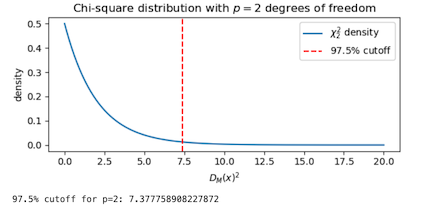

**Why $\chi^2$?**

If the data really were spherical and independent, then after whitening (removing correlations and scaling each feature to variance 1) we would have

$$
z = \Sigma^{-1/2}(x - \mu)
$$

and each component of $z$ would behave like a standard normal variable:

$$
z_1 \sim N(0,1),\quad
z_2 \sim N(0,1),\quad
\dots,\quad
z_p \sim N(0,1).
$$

Then

$$
D_M(x)^2 = z_1^2 + z_2^2 + \cdots + z_p^2.
$$

A sum of $p$ squared standard normal variables is exactly what defines a chi-square distribution with $p$ degrees of freedom.
So the chi-square distribution falls out naturally from the geometry.

**The $\chi^2$ decision boundary ellipse**

The decision boundary defined by your choice of $\chi^2$ parameter is a multivariate ellipse:

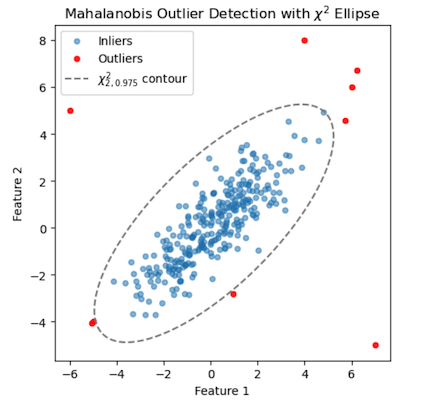

**What does the ellipse represent?**

For $p = 2$, the contour

$$
D_M(x)^2 = \chi^2_{2,,0.975}
$$

is the set of all points whose squared Mahalanobis distance equals the 97.5th percentile of the chi-square curve.
This contour is an **ellipse** (not a circle), because:

* the data are stretched differently in different directions (different variances), and
* the data cloud is oriented or tilted (correlations).

Thus the ellipse is the 2D analogue of a $3\sigma$ boundary:

* Points **inside** the ellipse are within the typical spread of the data.
* Points **outside** the ellipse are farther away than we would **expect** for 97.5% of the inliers.

If you mentally transform the data so that the covariance becomes the identity matrix, that ellipse becomes a perfect circle.
Mahalanobis distance is exactly the length in this transformed space.

So:

* The ellipse you see is the shape of "one circle's worth" of typical variation **after undoing the correlations and rescaling**.
* Outliers are points that fall outside this transformed-circle boundary.

---

## TL;DR

> *Mahalanobis distance measures distance after correcting for scale and correlation.*    
> *The squared distance behaves like a $\chi^2$ variable, so contours of constant Mahalanobis distance form ellipses.*    
> *Points outside the $\chi^2_{p,,0.975}$ ellipse are unusually far from the mean in the geometry of the data cloud and are natural outliers.*    



## Appendix 2: Where to go from here?

## 1. **Density-Based Methods**

Rather than defining distance thresholds, density methods look for regions where the data is *unusually sparse*.

### Examples:

* **LOF (Local Outlier Factor)**
  Compares local density of each point to density of its neighbors.
* **DBSCAN outlier detection**
  Points not assigned to any cluster are treated as noise.
* **Kernel density estimation (KDE)**
  Flag points whose estimated probability density is below a threshold.

### Why it's important:

* Outliers often correspond to *unusually low-density regions*.
* Works when data isn’t spherical/elliptical (unlike z-scores or Mahalanobis).


## 2. **Isolation-Based Methods**

These do not rely on distance or density, but on how quickly a point can be “isolated.”

### Example:

* **Isolation Forest** (widely used in practice)

### Intuition:

* If a random decision tree isolates a point in *few splits*, it is isolated, hence likely an outlier.

### Why it’s important:

* Handles high dimensions much better than distance-based methods.
* Requires almost no assumptions about shape of the data.


## 3. **Autoencoder-Based Outlier Detection**

(Useful when you get to Mod 7 with deep learning.)

### Idea:

* Train an autoencoder to reconstruct “normal” data.
* Outliers tend to reconstruct *poorly*, leading to high reconstruction error.

### Why it’s important:

* Works extremely well on images, time series, and structured data.
* Can model very complex data manifolds.



### Extra demo code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
k = 3.0             # z-score cutoff (try 2 or 3)
x_min, x_max = 0, 4 # plot only the right half

# x-grid and density
x = np.linspace(x_min, x_max, 400)
y = norm.pdf(x, loc=0, scale=1)

plt.figure(figsize=(6, 3))

# Normal density on [0, 4]
plt.plot(x, y, linewidth=2)

# Shade the "outlier" region z > k
mask = x >= k
plt.fill_between(x[mask], y[mask], 0, alpha=0.3)

# Vertical line at the cutoff
plt.axvline(k, linestyle="--")

plt.xlabel(r"$z$")
plt.ylabel("density")
plt.title("Decision Boundary for $|z| < 3$")
plt.xlim(x_min, x_max)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# degrees of freedom
p = 2

# x-range for the plot
x = np.linspace(0, 20, 400)

# chi-square pdf for df = 2
pdf = chi2.pdf(x, df=p)

# 97.5% cutoff (same as used in the Mahalanobis example)
cutoff_975 = chi2.ppf(0.975, df=p)

plt.figure(figsize=(6, 3))

plt.plot(x, pdf, label=r'$\chi^2_{2}$ density')
plt.axvline(cutoff_975, color="red", linestyle="--",
            label=r'$97.5\%$ cutoff')

plt.xlabel(r'$D_M(x)^2$')
plt.ylabel("density")
plt.title(r'Chi-square distribution with $p=2$ degrees of freedom')
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

print("97.5% cutoff for p=2:", cutoff_975)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# -----------------------------
# 1. Correlated 2D Gaussian + outliers
# -----------------------------
rng = np.random.default_rng(0)

n_inliers = 300
mean_true = np.array([0.0, 0.0])
cov_true  = np.array([[3.0, 2.5],
                      [2.5, 3.0]])   # strong positive correlation

X_in = rng.multivariate_normal(mean_true, cov_true, size=n_inliers)

# Some obvious outliers
X_out = np.array([
    [ 6.0,  6.0],
    [-6.0,  5.0],
    [ 7.0, -5.0],
    [-5.0, -4.0],
    [ 4.0,  8.0],
])

X = np.vstack([X_in, X_out])   # shape (n, 2)

# -----------------------------
# 2. Mahalanobis distances
# -----------------------------
mu = X.mean(axis=0)
Sigma = np.cov(X, rowvar=False)
Sigma_inv = np.linalg.inv(Sigma)

diff = X - mu
MD2 = np.sum(diff @ Sigma_inv * diff, axis=1)   # squared Mahalanobis

# Chi-square cutoff for 97.5% in 2D
p = X.shape[1]
cutoff = chi2.ppf(0.975, df=p)

is_out = MD2 > cutoff

# -----------------------------
# 3. Ellipse for the chi-square contour
# -----------------------------
eigvals, eigvecs = np.linalg.eigh(Sigma)
# sort eigenvalues descending
order = np.argsort(eigvals)[::-1]
eigvals = eigvals[order]
eigvecs = eigvecs[:, order]

theta = np.linspace(0, 2*np.pi, 400)
circle = np.stack([np.cos(theta), np.sin(theta)], axis=1)

# Radii of ellipse along principal axes
radii = np.sqrt(eigvals * cutoff)

# Map unit circle -> ellipse in original coordinates
ellipse = circle @ np.diag(radii) @ eigvecs.T + mu

# -----------------------------
# 4. Plot
# -----------------------------
fig, ax = plt.subplots(figsize=(5, 5))

ax.scatter(X[~is_out, 0], X[~is_out, 1],
           s=20, alpha=0.5, label="Inliers")
ax.scatter(X[is_out, 0], X[is_out, 1],
           s=20, alpha=0.9, color="red", label="Outliers")

ax.plot(ellipse[:, 0], ellipse[:, 1],
        color="grey", linestyle="--",
        label=r"$\chi^2_{2,0.975}$ contour")

ax.set_title("Mahalanobis Outlier Detection with $\chi^2$ Ellipse")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_aspect("equal", "box")
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()


$$
\text{Cov Matrix } \Sigma =
\begin{bmatrix}
3   & 2.5 \\
2.5 & 3
\end{bmatrix}
\qquad
\Sigma^{-1} =
\begin{bmatrix}
1.0909  & -0.9090 \\
-0.9090 &  1.0909
\end{bmatrix}
\qquad
\text{Corr Matrix } R =
\begin{bmatrix}
1.0  & 0.8333 \\
0.8333 &  1.0
\end{bmatrix}
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Covariance matrix Σ
Sigma = np.array([[3.0, 2.5],
                  [2.5, 3.0]])

# --- 1. Compute correlation matrix ---
# Corr[i,j] = Cov[i,j] / sqrt(Var[i] * Var[j])
D = np.sqrt(np.diag(Sigma))              # standard deviations
Corr = Sigma / np.outer(D, D)

print("Correlation matrix:\n", Corr)

# --- 2. Heatmap ---
fig, ax = plt.subplots(figsize=(4, 3))

im = ax.imshow(Corr, cmap="coolwarm", vmin=-1, vmax=1)

# Tick labels
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["X₁", "X₂"])
ax.set_yticklabels(["X₁", "X₂"])

# Annotate values
for i in range(2):
    for j in range(2):
        ax.text(j, i, f"{Corr[i,j]:.2f}", 
                ha="center", va="center", color="black")

ax.set_title("Correlation Matrix Heatmap")
fig.colorbar(im, ax=ax)

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Reproducibility
rng = np.random.default_rng(0)

n_points = 1000

# --- 1. Start with standard 2D normal N(0, I) ---
mean = np.zeros(2)
I = np.eye(2)

Z = rng.multivariate_normal(mean, I, size=n_points)  # "round" cloud

# --- 2. Desired covariance matrix Σ ---
Sigma = np.array([[3.0, 2.5],
                  [2.5, 3.0]])

# Cholesky factor: Σ = L L^T
L = np.linalg.cholesky(Sigma)

# Transform standard normal to correlated normal:
# X = Z L^T has covariance Σ
X = Z @ L.T

# (Optional) show inverse transform back to round:
# L_inv = np.linalg.inv(L)
# Z_back = X @ L_inv.T

# --- 3. Plot side by side ---
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].scatter(Z[:, 0], Z[:, 1], alpha=0.7,s=10)
axes[0].set_title("Standard normal $N(0, I)$")
axes[0].set_xlabel("$z_1$")
axes[0].set_ylabel("$z_2$")
axes[0].set_aspect("equal", "box")

axes[1].scatter(X[:, 0], X[:, 1], alpha=0.7,s=10)
axes[1].set_title(r"Correlated normal $N(0, \Sigma)$")
axes[1].set_xlabel("$x_1$")
axes[1].set_ylabel("$x_2$")
axes[1].set_aspect("equal", "box")

plt.tight_layout()
plt.show()
